# Part 1. Basic Data Exploring and Cleaning

In [39]:
#Import the necessary tools and data
import pandas as pd
import numpy as np
import matplotlib as plt
edu_df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [40]:
#Get the first acquaintance with the dataset: number of coulmns and rows, column names, data types
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [41]:
#Standardize the column names: remove whitespaces, unify the letter case, substitute spaces and hyphens/dashes with underscore
edu_df.columns = (edu_df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('-','_'))

In [42]:
#Revise new names for columns
edu_df.columns

Index(['school_dbn', 'school_name', 'school_level', 'regents_exam', 'year',
       'total_tested', 'mean_score', 'number_scoring_below_65',
       'percent_scoring_below_65', 'number_scoring_65_or_above',
       'percent_scoring_65_or_above', 'number_scoring_80_or_above',
       'percent_scoring_80_or_above', 'number_scoring_cr',
       'percent_scoring_cr'],
      dtype='object')

In [43]:
#Check for missing values
edu_df.isnull().sum()

,0
school_dbn,0
school_name,0
school_level,0
regents_exam,10
year,0
total_tested,0
mean_score,0
number_scoring_below_65,0
percent_scoring_below_65,0
number_scoring_65_or_above,0


In [45]:
#Set the float data type for 'mean_score' column
edu_df['mean_score'].astype(float)

ValueError: could not convert string to float: 's'

In [46]:
#Old-school visual inspection and preliminary attempt to set the float data type for 'mean_score' column showed the presense of non-numeric string values 's' and 'na'
edu_df.sample(5)

,school_dbn,school_name,school_level,regents_exam,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above,number_scoring_cr,percent_scoring_cr
58182,02M500,Unity Center for Urban Technologies,High school,Algebra2/Trigonometry,2015,5,s,s,s,s,s,s,s,na,na
103794,02M288,Food and Finance High School,High school,Global History and Geography,2015,80,65.3,26,32.5,54,67.5,8,10,na,na
20172,02M255,M.S. 255 Salk School of Science,Junior High-Intermediate-Middle,Common Core Algebra,2017,82,89,0,0,82,100,81,98.8,82,100
72563,11X019,P.S. 019 Judith K. Weiss,K-8,Common Core Algebra,2016,14,s,s,s,s,s,s,s,na,na
136507,84K359,The Uft Charter School,High school,English,2015,28,61.6,14,50,14,50,1,3.6,6,21.4


In [47]:
#Convert the data type for each column one by one using FOR cycle. It automatically assigns NaN - standardized missing value - to cells containing 's' and 'na' values.
columns_to_convert = ['mean_score', 'number_scoring_below_65', 'percent_scoring_below_65', 'number_scoring_65_or_above','percent_scoring_65_or_above', 'number_scoring_80_or_above', 'percent_scoring_80_or_above', 'number_scoring_cr', 'percent_scoring_cr']

for columns in columns_to_convert:
    edu_df[columns] = pd.to_numeric(edu_df[columns], errors='coerce')

In [48]:
#Check the accuracy of data type converting
edu_df.dtypes

,0
school_dbn,object
school_name,object
school_level,object
regents_exam,object
year,int64
total_tested,int64
mean_score,float64
number_scoring_below_65,float64
percent_scoring_below_65,float64
number_scoring_65_or_above,float64


In [49]:
#Visual check up on how the data changed: 's' and 'na' values substituted with NaN
edu_df.sample(5)

,school_dbn,school_name,school_level,regents_exam,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above,number_scoring_cr,percent_scoring_cr
65655,07X670,Health Opportunities High School,High school,Integrated Algebra,2015,11,60.2,6.0,54.5,5.0,45.5,1.0,9.1,1.0,9.1
50369,32K168,The Brooklyn School for Math and Research,High school,Living Environment,2017,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58152,02M489,High School of Economics and Finance,High school,Physical Settings/Chemistry,2015,45,58.8,32.0,71.1,13.0,28.9,2.0,4.4,NaN,NaN
37245,15K667,Sunset Park High School,High school,English,2016,14,48.4,12.0,85.7,2.0,14.3,0.0,0.0,0.0,0.0
109881,06M423,High School for Excellence and Innovation,High school,English,2015,36,66.6,12.0,33.3,24.0,66.7,4.0,11.1,6.0,16.7


In [50]:
#Data type conversion resulted in new missing values
edu_df.isnull().sum()

,0
school_dbn,0
school_name,0
school_level,0
regents_exam,10
year,0
total_tested,0
mean_score,75222
number_scoring_below_65,75222
percent_scoring_below_65,75222
number_scoring_65_or_above,75222


In [52]:
#Drop rows that contain 4 or more missing values and subset the cleaned dataframe
refined_df = edu_df.dropna(thresh=edu_df.shape[1]-4+1)
refined_df.shape

(137109, 13)

In [51]:
#Drop the last 2 columns 'number_scoring_cr' and 'percent_scoring_cr' as they contain too much noise
edu_df.drop('number_scoring_cr', axis=1, inplace=True)
edu_df.drop('percent_scoring_cr', axis=1, inplace=True)

In [53]:
refined_df.isnull().sum()

,0
school_dbn,0
school_name,0
school_level,0
regents_exam,8
year,0
total_tested,0
mean_score,0
number_scoring_below_65,0
percent_scoring_below_65,0
number_scoring_65_or_above,0


In [54]:
#Visual check on missing values that are still left
missing_values = refined_df[refined_df['regents_exam'].isnull()]
print(missing_values)

       school_dbn                                   school_name  \
18654      84M478  Inwood Academy for Leadership Charter School   
52756      84M478  Inwood Academy for Leadership Charter School   
52757      84M478  Inwood Academy for Leadership Charter School   
100866     84M478  Inwood Academy for Leadership Charter School   
138300     84M478  Inwood Academy for Leadership Charter School   
138301     84M478  Inwood Academy for Leadership Charter School   
209785     84M478  Inwood Academy for Leadership Charter School   
209786     84M478  Inwood Academy for Leadership Charter School   

            school_level regents_exam  year  total_tested  mean_score  \
18654   Secondary School          NaN  2015            90        55.6   
52756   Secondary School          NaN  2015            81        55.9   
52757   Secondary School          NaN  2015             9        53.4   
100866  Secondary School          NaN  2015            54        57.4   
138300  Secondary School       

In [55]:
#Drop rows with NaN values in 'regents_exam' column as they don't make the weather
rows_to_drop = [18654,52756,52757,100866,138300,138301,209785,209786]
refined_df = refined_df.drop(index=rows_to_drop)

In [56]:
refined_df.shape

(137101, 13)

In [57]:
#The original dataset shrank by 35%
print(f"{(137101 / 212331) * 100:.2f}%")

64.57%


# Part 2. Data Wrangling and Dissecting

In [58]:
#Dissect 'school_dbn' column into three new separated columns
refined_df['district'] = refined_df['school_dbn'].str.extract(r'(\d+)')
refined_df['borough_number'] = refined_df['school_dbn'].str.extract(r'([A-Za-z])')
refined_df['school_number'] = refined_df['school_dbn'].str.extract(r'(\d+)$')

In [59]:
#Set up a dictionary called borough_dict that maps borough abbreviations (keys) to their full names (values)
borough_dict = {'K':'Brooklyn', 'M':'Manhattan', 'Q':'Queens', 'R':'Staten Island', 'X':'Bronx'}

#Create new column called 'borough' and load it with values
refined_df['borough'] = refined_df['borough_number'].map(borough_dict)

In [60]:
#Drop unnecessary column
refined_df.drop(columns='borough_number', inplace=True)
#refined_df.drop['borough_number', axis=1, inplace=True]

In [61]:
#Reorder columns
new_order = ['school_dbn','borough','district','school_number','school_name',
             'school_level','regents_exam','year','total_tested','mean_score',
             'number_scoring_below_65','percent_scoring_below_65',
             'number_scoring_65_or_above','percent_scoring_65_or_above',
             'number_scoring_80_or_above','percent_scoring_80_or_above']

refined_df = refined_df[new_order]

In [62]:
#Visual check up
refined_df.sample(5)

,school_dbn,borough,district,school_number,school_name,school_level,regents_exam,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above
104402,02M392,Manhattan,02,392,MANHATTAN BUSINESS ACADEMY,High school,Common Core Geometry,2015,7,55.0,7.0,100.0,0.0,0.0,0.0,0.0
128454,24Q264,Queens,24,264,Academy of Finance and Enterprise,High school,English,2015,35,81.1,1.0,2.9,34.0,97.1,19.0,54.3
198425,28Q350,Queens,28,350,Jamaica Gateway to the Sciences,High school,Global History and Geography,2016,70,64.7,33.0,47.1,37.0,52.9,13.0,18.6
133023,28Q896,Queens,28,896,"Young Women's Leadership School, Queens",Secondary School,Living Environment,2015,110,71.1,31.0,28.2,79.0,71.8,30.0,27.3
19121,84X345,Bronx,84,345,Hyde Leadership Charter School,K-12 all grades,Common Core English,2016,109,75.0,17.0,15.6,92.0,84.4,43.0,39.4


In [63]:
#Be sure to check the data types after creating new columns. In my case 'district' and 'school_number' columns got a string data type which is inappropriate
refined_df.dtypes

,0
school_dbn,object
borough,object
district,object
school_number,object
school_name,object
school_level,object
regents_exam,object
year,int64
total_tested,int64
mean_score,float64


In [64]:
#Change the data type
refined_df['district'] = refined_df['district'].astype(int)
print(refined_df['district'].dtypes)

refined_df['school_number'] = refined_df['school_number'].astype(int)
print(refined_df['school_number'].dtypes)

int64
int64


# Part 3. Closer to Calculations and Stats

In [189]:
#Subset the general statistics
general_stats = refined_df[['mean_score','regents_exam','percent_scoring_below_65','percent_scoring_65_or_above','percent_scoring_80_or_above']].describe().round(2)
print(general_stats.T)

                                count   mean    std   min   25%   50%   75%  \
mean_score                   137101.0  66.00  11.29  15.0  58.3  65.4  73.4   
percent_scoring_below_65     137101.0  41.93  28.41   0.0  17.5  40.2  64.0   
percent_scoring_65_or_above  137101.0  58.07  28.41   0.0  36.0  59.8  82.5   
percent_scoring_80_or_above  137101.0  22.69  26.16   0.0   2.2  12.5  34.5   

                               max  
mean_score                    98.7  
percent_scoring_below_65     100.0  
percent_scoring_65_or_above  100.0  
percent_scoring_80_or_above  100.0  


In [190]:
#Calculate the general mean score per each year
refined_df.groupby(['year'])['mean_score'].mean().round(1)

,mean_score
year,
2015,65.7
2016,65.6
2017,66.7


<Axes: xlabel='year'>

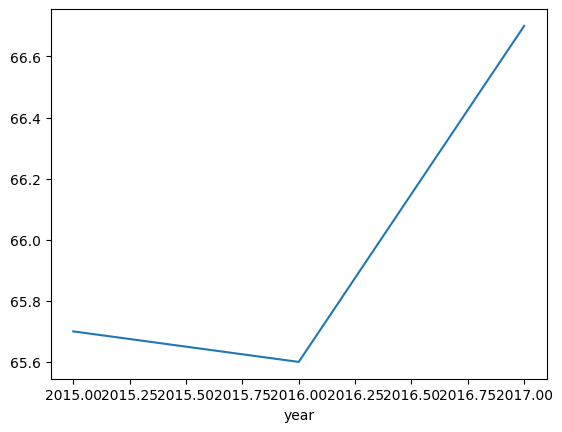

In [191]:
#Visualize the basic trend
refined_df.groupby(['year'])['mean_score'].mean().round(1).plot()

In [192]:
#Find out the most common regents exam
refined_df.groupby(['regents_exam'])['school_dbn'].count().sort_values(ascending=False)

,school_dbn
regents_exam,
Common Core Algebra,19549
Living Environment,18243
U.S. History and Government,14752
Global History and Geography,14713
Common Core English,13319
Physical Settings/Earth Science,10397
Common Core Geometry,9546
English,6784
Physical Settings/Chemistry,6360


In [193]:
#Define the top 5 schools that showed the best results in Common Core Algebra among all boroughs
core_algebra = refined_df[(refined_df['regents_exam'] == 'Common Core Algebra')].sort_values('mean_score', ascending=False).head(5)
core_algebra.head()

,school_dbn,borough,district,school_number,school_name,school_level,regents_exam,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above
165364,10X445,Bronx,10,445,Bronx High School of Science,High school,Common Core Algebra,2017,7,96.6,0.0,0.0,7.0,100.0,7.0,100.0
149900,03M334,Manhattan,3,334,The Anderson School,K-8,Common Core Algebra,2017,14,94.9,0.0,0.0,14.0,100.0,14.0,100.0
103494,02M114,Manhattan,2,114,East Side Middle School,Junior High-Intermediate-Middle,Common Core Algebra,2017,29,94.9,0.0,0.0,29.0,100.0,29.0,100.0
141070,02M114,Manhattan,2,114,East Side Middle School,Junior High-Intermediate-Middle,Common Core Algebra,2017,36,94.8,0.0,0.0,36.0,100.0,36.0,100.0
105744,02M475,Manhattan,2,475,Stuyvesant High School,High school,Common Core Algebra,2017,20,94.8,0.0,0.0,20.0,100.0,20.0,100.0


In [194]:
#General statistics about Staten Island schools
selected_columns = ['mean_score','number_scoring_below_65','percent_scoring_below_65',
           'number_scoring_65_or_above','percent_scoring_65_or_above',
           'number_scoring_80_or_above','percent_scoring_80_or_above']
refined_df[refined_df['borough'] == 'Staten Island'][selected_columns].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
mean_score,4652.0,69.10,11.53,29.3,60.8,67.9,77.4,97.0
number_scoring_below_65,4652.0,43.42,66.94,0.0,3.0,15.0,52.0,567.0
percent_scoring_below_65,4652.0,35.54,27.24,0.0,11.1,33.3,56.1,100.0
number_scoring_65_or_above,4652.0,88.63,137.03,0.0,11.0,37.0,98.0,1223.0
percent_scoring_65_or_above,4652.0,64.46,27.24,0.0,43.9,66.7,88.9,100.0
number_scoring_80_or_above,4652.0,41.14,79.51,0.0,2.0,11.0,44.0,891.0
percent_scoring_80_or_above,4652.0,30.53,30.26,0.0,6.3,18.4,50.0,100.0


In [195]:
#Subset the data of the district 31 (Staten Island)
district_31_df = refined_df[refined_df['district'] == 31]

In [196]:
district_31_df['regents_exam'].unique()

array(['Common Core Algebra', 'Physical Settings/Earth Science',
       'Living Environment', 'U.S. History and Government',
       'Algebra2/Trigonometry', 'Common Core Algebra2',
       'Common Core English', 'Common Core Geometry', 'English',
       'Geometry', 'Global History and Geography', 'Integrated Algebra',
       'Physical Settings/Chemistry', 'Physical Settings/Physics'],
      dtype=object)

In [197]:
#Define top 5 schools in Staten Island that showed the best results in Common Core Algebra
core_algebra_d_31 = district_31_df[(district_31_df['regents_exam'] == 'Common Core Algebra')].sort_values('mean_score', ascending=False).head(5)
core_algebra_d_31.head(5)

,school_dbn,borough,district,school_number,school_name,school_level,regents_exam,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above
135604,31R605,Staten Island,31,605,Staten Island Technical High School,High school,Common Core Algebra,2017,15,93.3,0.0,0.0,15.0,100.0,15.0,100.0
203867,31R063,Staten Island,31,63,Marsh Avenue School for Expeditionary Learning,Junior High-Intermediate-Middle,Common Core Algebra,2017,7,91.3,0.0,0.0,7.0,100.0,7.0,100.0
205493,31R605,Staten Island,31,605,Staten Island Technical High School,High school,Common Core Algebra,2017,23,90.9,0.0,0.0,23.0,100.0,23.0,100.0
205490,31R605,Staten Island,31,605,Staten Island Technical High School,High school,Common Core Algebra,2017,31,90.8,0.0,0.0,31.0,100.0,31.0,100.0
17224,31R605,Staten Island,31,605,Staten Island Technical High School,High school,Common Core Algebra,2017,57,90.6,0.0,0.0,57.0,100.0,56.0,98.2


In [198]:
#Count the number of unique school names in Staten Island borough
school_names = refined_df[refined_df['borough'] == 'Staten Island']['school_name'].nunique()
print(school_names)

29


In [199]:
#Print the school names and choose one for comparison
school_names = refined_df[refined_df['borough'] == 'Staten Island']['school_name'].unique()
school_names = list(school_names)
print('\n'.join(school_names))

I.S. R002 George L. Egbert
I.S. 007 Elias Bernstein
I.S. 024 Myra S. Barnes
I.S. 027 Anning S. Prall
The Eagle Academy for Young Men of Staten Island
I.S. 034 Tottenville
CSI High School for International Studies
P.S. 048 William G. Wilcox
I.S. 49 Berta A. Dreyfus
I.S. 051 Edwin Markham
I.S. 061 William A Morris
Marsh Avenue School for Expeditionary Learning
Gaynor McCown Expeditionary Learning School
I.S. 072 Rocco Laurie
I.S. 075 Frank D. Paulo
The Michael J. Petrides School
New Dorp High School
Port Richmond High School
Curtis High School
Tottenville High School
Susan E. Wagner High School
Concord High School
Ralph R. McKee Career and Technical Education High
Staten Island Technical High School
Staten Island Yabc
Staten Island School of Civic Leadership
New Ventures Charter School
John W. Lavelle Preparatory Charter School
New World Preparatory Charter School


In [200]:
#Subset information about the chosen school for comparison
school_24_df = refined_df[refined_df['school_name'] == 'I.S. 024 Myra S. Barnes']

#Print the dataframe as a table
from tabulate import tabulate
print(tabulate(school_24_df, headers='keys', tablefmt='fancy_grid'))

╒════════╤══════════════╤═══════════════╤════════════╤═════════════════╤═════════════════════════╤═════════════════════════════════╤═════════════════════════════════╤════════╤════════════════╤══════════════╤═══════════════════════════╤════════════════════════════╤══════════════════════════════╤═══════════════════════════════╤══════════════════════════════╤═══════════════════════════════╕
│        │ school_dbn   │ borough       │   district │   school_number │ school_name             │ school_level                    │ regents_exam                    │   year │   total_tested │   mean_score │   number_scoring_below_65 │   percent_scoring_below_65 │   number_scoring_65_or_above │   percent_scoring_65_or_above │   number_scoring_80_or_above │   percent_scoring_80_or_above │
╞════════╪══════════════╪═══════════════╪════════════╪═════════════════╪═════════════════════════╪═════════════════════════════════╪═════════════════════════════════╪════════╪════════════════╪══════════════╪═══════════

In [201]:
#Get the top 5 highest mean score for Common Core Algebra in school #24 in Staten Island
core_algebra_s_24 = school_24_df[(school_24_df['regents_exam'] == 'Common Core Algebra')].sort_values('mean_score', ascending=False).head(5)
print(core_algebra_s_24)

       school_dbn        borough  district  school_number  \
203517     31R024  Staten Island        31             24   
134739     31R024  Staten Island        31             24   
203519     31R024  Staten Island        31             24   
96537      31R024  Staten Island        31             24   
16782      31R024  Staten Island        31             24   

                    school_name                     school_level  \
203517  I.S. 024 Myra S. Barnes  Junior High-Intermediate-Middle   
134739  I.S. 024 Myra S. Barnes  Junior High-Intermediate-Middle   
203519  I.S. 024 Myra S. Barnes  Junior High-Intermediate-Middle   
96537   I.S. 024 Myra S. Barnes  Junior High-Intermediate-Middle   
16782   I.S. 024 Myra S. Barnes  Junior High-Intermediate-Middle   

               regents_exam  year  total_tested  mean_score  \
203517  Common Core Algebra  2017             8        84.3   
134739  Common Core Algebra  2017            68        82.1   
203519  Common Core Algebra  2017  

In [202]:
#Calculate summary statistics for School 24 and District 31

school_24_stats = school_24_df[['mean_score', 'percent_scoring_below_65', 'percent_scoring_65_or_above', 'percent_scoring_80_or_above']]
school_24_stats.describe().round(1)

,mean_score,percent_scoring_below_65,percent_scoring_65_or_above,percent_scoring_80_or_above
count,48.0,48.0,48.0,48.0
mean,78.2,8.8,91.2,51.9
std,4.4,9.5,9.5,23.2
min,68.3,0.0,62.5,0.0
25%,74.8,1.5,82.4,42.1
50%,79.2,4.8,95.2,52.8
75%,81.7,17.6,98.5,67.8
max,86.5,37.5,100.0,87.5


In [203]:
district_31_stats = district_31_df[['mean_score', 'percent_scoring_below_65', 'percent_scoring_65_or_above', 'percent_scoring_80_or_above']]
district_31_stats.describe().round(2)

,mean_score,percent_scoring_below_65,percent_scoring_65_or_above,percent_scoring_80_or_above
count,4374.00,4374.00,4374.00,4374.00
mean,69.20,35.69,64.31,30.98
std,11.70,27.50,27.50,30.66
min,29.30,0.00,0.00,0.00
25%,60.72,10.60,43.20,6.20
50%,68.00,33.30,66.70,18.50
75%,77.80,56.80,89.40,50.80
max,97.00,100.00,100.00,100.00


In [204]:
#Print summary statistics for School 24 and District 31
#print("School 24 Statistics:\n", school_24_stats)
#print("\nDistrict 31 Statistics:\n", district_31_stats)

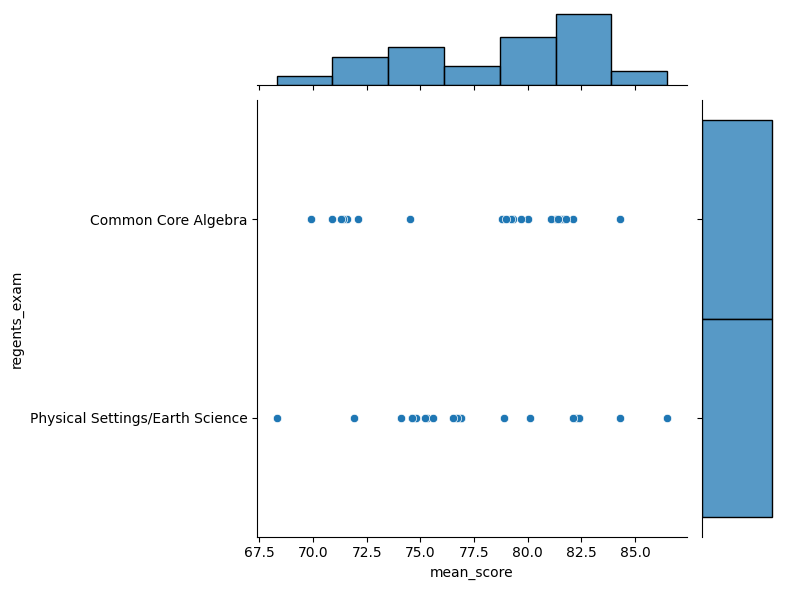

In [205]:
import seaborn as sns
%matplotlib inline
sns.jointplot(x='mean_score', y='regents_exam', data = school_24_df)

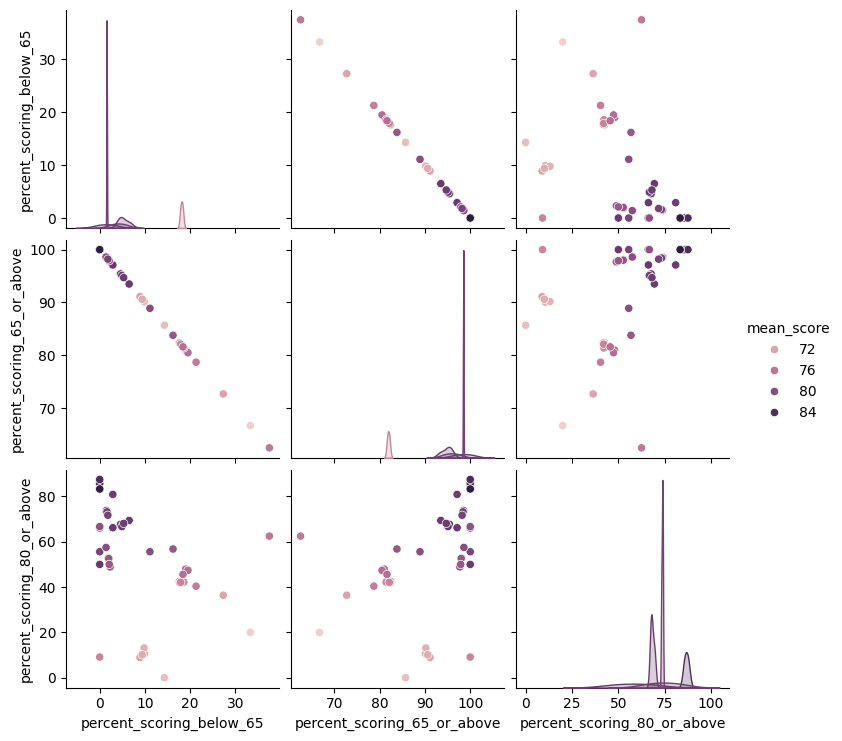

In [206]:
sns.pairplot(data = school_24_stats, hue='mean_score')

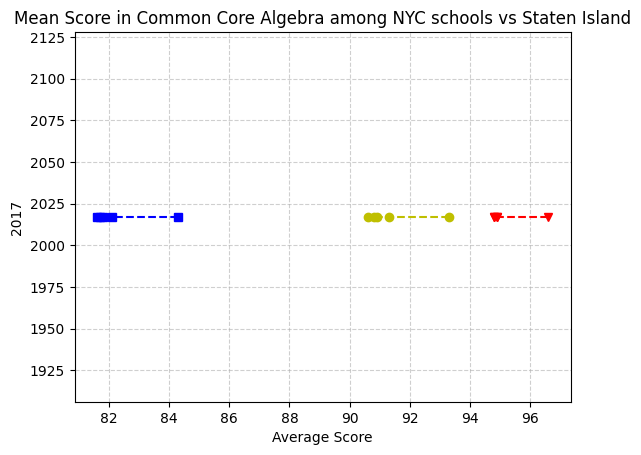

In [213]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
#ax.legend(["NYC Schools", "District 31", "Staten Island"], loc="best")
ax.grid(True, linestyle="--", alpha=0.6)
ax.set_xlabel("Average Score")
ax.set_ylabel("2017")
ax.set_title("Mean Score in Common Core Algebra among NYC schools vs Staten Island")

ax.plot(core_algebra['mean_score'], core_algebra['year'], color ='r', marker ='v', linestyle = '--')
ax.plot(core_algebra_d_31['mean_score'], core_algebra_d_31['year'], color ='y', marker = 'o', linestyle = '--')
ax.plot(core_algebra_s_24['mean_score'], core_algebra_s_24['year'], color = 'b', marker = 's', linestyle = '--')

plt.show()
